In [930]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [931]:
#Importando a base de dados
data_frame = pd.read_csv('netflix_titles.csv')
data_frame

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [932]:
#Coletando informações sobre os tipos de dados
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**Limpeza de Dados**


In [933]:
#Excluindo as colunas director e cast (sem muita informações)
colunas_excluidas = ['director','cast']

df = data_frame.drop(colunas_excluidas,axis=1)
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [934]:
#Verificando os campos nulos
df.isnull().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

**Conversão de datas**

In [935]:
df["date_added"] = pd.to_datetime(df["date_added"])
df["date_added"].head()

0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-24
4   2021-09-24
Name: date_added, dtype: datetime64[ns]

In [936]:
#Adicionando colunas mês e ano para as datas de adição 
df['Ano_Adição'] = pd.DatetimeIndex( df['date_added'] ).year
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Ano_Adição
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0
2,s3,TV Show,Ganglands,NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0


In [937]:
#Excluir essas linhas NaN
df[df['duration'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Ano_Adição
5541,s5542,Movie,Louis C.K. 2017,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi...",2017.0
5794,s5795,Movie,Louis C.K.: Hilarious,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...,2016.0
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...,2016.0


In [938]:
#Excluindo
df = df[df['duration'].notna()]

In [939]:
#Linhas nulas excluidas
df['duration'].isna().sum()

0

In [940]:
#Verificando os valores NaN da coluna rating
df[df['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Ano_Adição
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,2017-01-26,2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...,2017.0
6827,s6828,TV Show,Gargantia on the Verdurous Planet,Japan,2016-12-01,2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel...",2016.0
7312,s7313,TV Show,Little Lunch,Australia,2018-02-01,2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take...",2018.0
7537,s7538,Movie,My Honor Was Loyalty,Italy,2017-03-01,2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c...",2017.0


In [941]:
#Substituindo os valores NaN da coluna rating
rating_replace = {
  5989 : 'TV-PG',
  6827 : 'TV-14',
  7312 : 'TV-MA',
  7537 : 'PG-13',

}

for index, classificacao in rating_replace.items():
    df.loc[index,'rating'] = classificacao

df['rating'].isna().sum() 

0

In [942]:
#Quantidade de nulos na coluna datas
df['date_added'].isna().sum()

10

In [943]:
#Excluindo os NaN da coluna data
df = df[df['date_added'].notna()]

In [944]:
df['date_added'].isna().sum()

0

In [945]:
#Quantos valores únicos para países temos
df['country'].nunique()

748

In [946]:
df['country'].isna().sum()

830

In [947]:
#Trocando os valores nulos pela moda dos Países
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [948]:

df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
Ano_Adição      0
dtype: int64

In [949]:
#Classificação indicativa
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [950]:
#Criando coluna de classificação indicativa
maturity_rating = {
    'PG-13': 'Acima de 13 anos',
    'TV-MA': 'Adulto',
    'PG': 'Criança acompanhada',
    'TV-14': 'Acima de 14 anos',
    'TV-PG': 'Criança acompanhada',
    'TV-Y': 'Infantil',
    'TV-Y7': 'Acima de 7 anos',
    'R': 'Adulto',
    'TV-G': 'Geral',
    'G': 'Geral',
    'NC-17': 'Adulto',
    'NR': 'Adulto',
    'TV-Y7-FV': 'Acima de 7 anos',
    'UR': 'Adulto'

}

df['classificacao indicativa'] = df['rating'].replace(maturity_rating)
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Ano_Adição,classificacao indicativa
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Acima de 13 anos
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Adulto
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Adulto
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Adulto
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Adulto
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,Adulto
8803,s8804,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,Acima de 7 anos
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,Adulto
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Criança acompanhada


In [951]:
#Coluna Gênero

def genero(linha):
    return str(linha['listed_in']).split(', ')[0]

df['genero'] = df.apply(genero,axis=1)    
df

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,Ano_Adição,classificacao indicativa,genero
0,s1,Movie,Dick Johnson Is Dead,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,Acima de 13 anos,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,Adulto,International TV Shows
2,s3,TV Show,Ganglands,United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,Adulto,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,Adulto,Docuseries
4,s5,TV Show,Kota Factory,India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,Adulto,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019.0,Adulto,Cult Movies
8803,s8804,TV Show,Zombie Dumb,United States,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019.0,Acima de 7 anos,Kids' TV
8804,s8805,Movie,Zombieland,United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019.0,Adulto,Comedies
8805,s8806,Movie,Zoom,United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020.0,Criança acompanhada,Children & Family Movies


In [952]:
df = df.drop(['date_added','rating', 'listed_in', 'description'], axis = 1)
df

,show_id,type,title,country,release_year,duration,Ano_Adição,classificacao indicativa,genero
0,s1,Movie,Dick Johnson Is Dead,United States,2020,90 min,2021.0,Acima de 13 anos,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021,2 Seasons,2021.0,Adulto,International TV Shows
2,s3,TV Show,Ganglands,United States,2021,1 Season,2021.0,Adulto,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,United States,2021,1 Season,2021.0,Adulto,Docuseries
4,s5,TV Show,Kota Factory,India,2021,2 Seasons,2021.0,Adulto,International TV Shows
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2007,158 min,2019.0,Adulto,Cult Movies
8803,s8804,TV Show,Zombie Dumb,United States,2018,2 Seasons,2019.0,Acima de 7 anos,Kids' TV
8804,s8805,Movie,Zombieland,United States,2009,88 min,2019.0,Adulto,Comedies
8805,s8806,Movie,Zoom,United States,2006,88 min,2020.0,Criança acompanhada,Children & Family Movies


In [953]:
#Editando a coluna 'duration' para conter apenas o número de temporada é minutos do filme
df['duration'] = df['duration'].replace('Season', '', regex=True).replace('Seasons','', regex=True).replace('s','', regex=True).replace('min','', regex=True).replace('max','', regex=True)
df

,show_id,type,title,country,release_year,duration,Ano_Adição,classificacao indicativa,genero
0,s1,Movie,Dick Johnson Is Dead,United States,2020,90,2021.0,Acima de 13 anos,Documentaries
1,s2,TV Show,Blood & Water,South Africa,2021,2,2021.0,Adulto,International TV Shows
2,s3,TV Show,Ganglands,United States,2021,1,2021.0,Adulto,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,United States,2021,1,2021.0,Adulto,Docuseries
4,s5,TV Show,Kota Factory,India,2021,2,2021.0,Adulto,International TV Shows
...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,United States,2007,158,2019.0,Adulto,Cult Movies
8803,s8804,TV Show,Zombie Dumb,United States,2018,2,2019.0,Acima de 7 anos,Kids' TV
8804,s8805,Movie,Zombieland,United States,2009,88,2019.0,Adulto,Comedies
8805,s8806,Movie,Zoom,United States,2006,88,2020.0,Criança acompanhada,Children & Family Movies


**Análise dos dados**

In [954]:
#Os 10 países com mais produções
country = df['country'].value_counts().head(10)
country 

United States     3639
India              972
United Kingdom     418
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

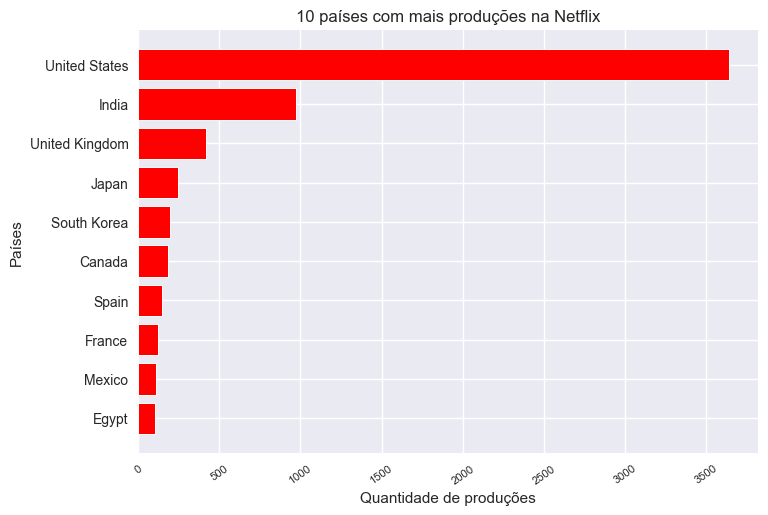

In [955]:
#Plotagem do gráfico series
plt.figure()
plt.barh(country.sort_values().index, country.sort_values(), color='red', edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Países')
plt.xlabel('Quantidade de produções')
plt.title('10 países com mais produções na Netflix')
plt.show()

In [956]:
#Agrupando por tipo de conteúdo (filme ou série)
tipo = df['type'].value_counts()
tipo

Movie      6128
TV Show    2666
Name: type, dtype: int64

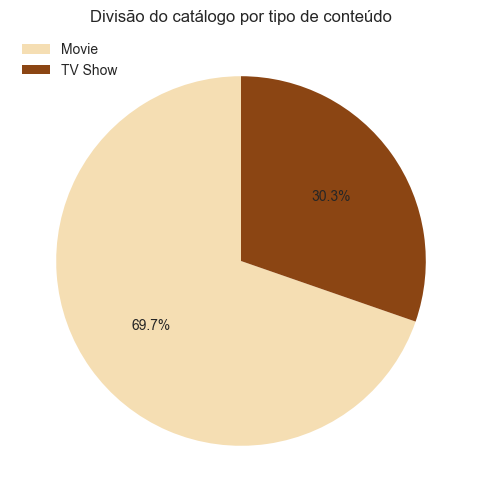

In [957]:
#Definindo o tamanho da figura
plt.figure(figsize =(15,6))

#Definição do tema
plt.title("Divisão do catálogo por tipo de conteúdo")

#Plotagem do gráfico
colors= ['wheat','saddlebrown']
grafico = plt.pie(tipo, colors=colors, startangle=90, autopct='%1.1f%%')

#Adicionando legenda
legenda = tipo.index
plt.legend(legenda)
plt.show()

In [981]:
#Agrupando por tipo e ano de adição
tipo_ano = df.groupby(['Ano_Adição','type']).size().unstack()
tipo_ano

type,Movie,TV Show
Ano_Adição,,
2008.0,1.0,1.0
2009.0,2.0,NaN
2010.0,1.0,NaN
2011.0,13.0,NaN
2012.0,3.0,NaN
2013.0,6.0,5.0
2014.0,19.0,5.0
2015.0,56.0,26.0
2016.0,251.0,176.0


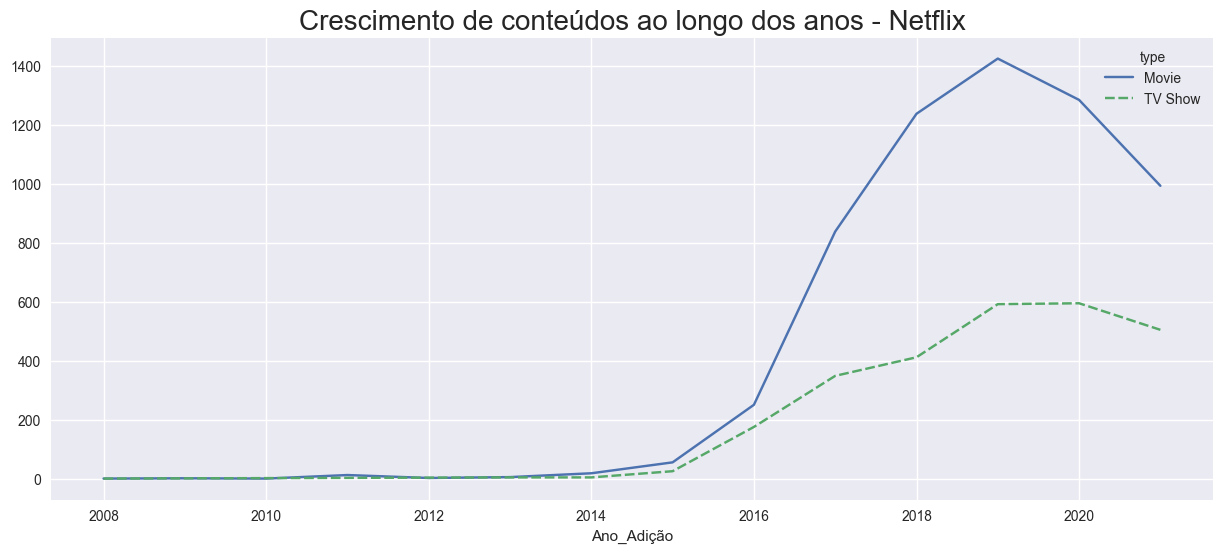

In [982]:
#Plotagem do agrupamento tipo/ano
plt.figure(figsize=(15,6))
sns.lineplot(data = tipo_ano)
plt.title('Crescimento de conteúdos ao longo dos anos - Netflix', fontsize=20)
plt.show()


**Análise por tipo de conteúdo - Séries**

In [960]:
#Criando o dataframe Series
df_series = df[df['type'] == 'TV Show']
df_series

,show_id,type,title,country,release_year,duration,Ano_Adição,classificacao indicativa,genero
1,s2,TV Show,Blood & Water,South Africa,2021,2,2021.0,Adulto,International TV Shows
2,s3,TV Show,Ganglands,United States,2021,1,2021.0,Adulto,Crime TV Shows
3,s4,TV Show,Jailbirds New Orleans,United States,2021,1,2021.0,Adulto,Docuseries
4,s5,TV Show,Kota Factory,India,2021,2,2021.0,Adulto,International TV Shows
5,s6,TV Show,Midnight Mass,United States,2021,1,2021.0,Adulto,TV Dramas
...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,"Japan, Canada",2015,2,2018.0,Acima de 7 anos,Anime Series
8796,s8797,TV Show,Yunus Emre,Turkey,2016,2,2017.0,Criança acompanhada,International TV Shows
8797,s8798,TV Show,Zak Storm,"United States, France, South Korea, Indonesia",2016,3,2018.0,Acima de 7 anos,Kids' TV
8800,s8801,TV Show,Zindagi Gulzar Hai,Pakistan,2012,1,2016.0,Criança acompanhada,International TV Shows


In [961]:
genero = df_series['genero'].value_counts().head(10)
genero

International TV Shows    773
Crime TV Shows            399
Kids' TV                  386
British TV Shows          252
Docuseries                220
Anime Series              175
Reality TV                120
TV Comedies               119
TV Dramas                  67
TV Action & Adventure      39
Name: genero, dtype: int64

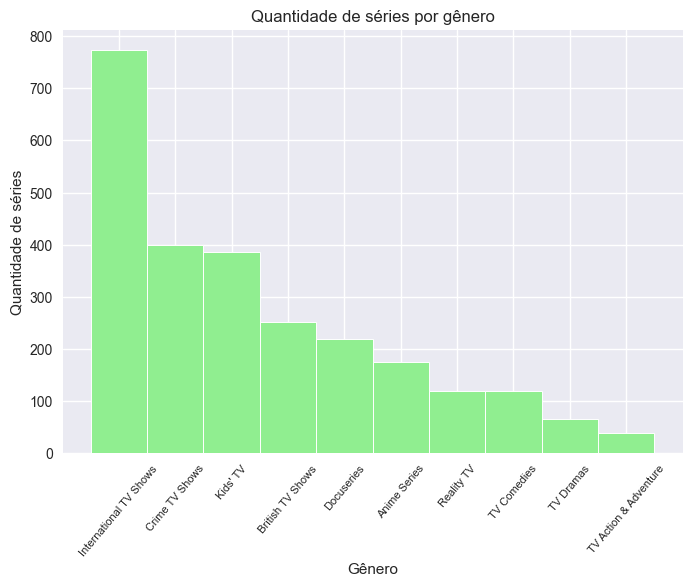

In [962]:
#Plotagem do gráfico series

plt.figure()
plt.bar(genero.index, genero, color='lightgreen', width=1, edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=50,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Quantidade de séries')
plt.xlabel('Gênero')
plt.title('Quantidade de séries por gênero')
plt.show()

In [963]:
#5 países com mais produções de séries
country_series = df_series['country'].value_counts().head(5)
country_series

United States     1144
United Kingdom     212
Japan              168
South Korea        158
India               79
Name: country, dtype: int64

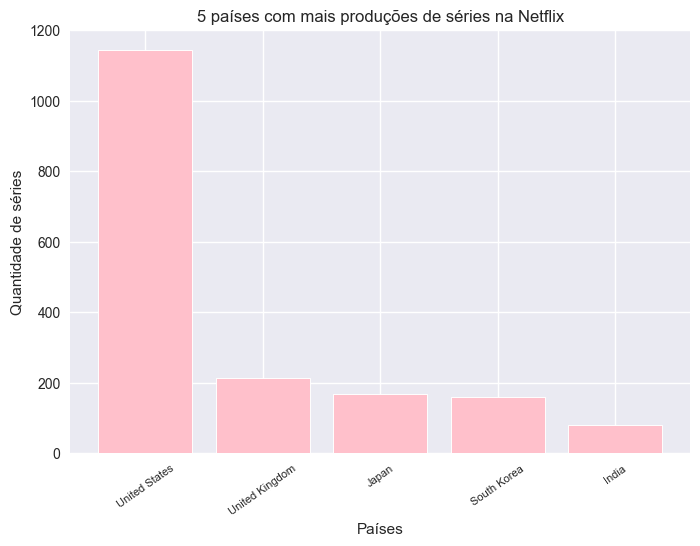

In [964]:
#Plotagem do gráfico series
plt.figure()
plt.bar(country_series.index, country_series, color='pink', edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Quantidade de séries')
plt.xlabel('Países')
plt.title('5 países com mais produções de séries na Netflix')
plt.show()

In [965]:
#Quantidade de produções nos ultimos 10 anos
series_ano = df_series['release_year'].value_counts().head(10)
series_ano

2020    436
2019    397
2018    379
2021    315
2017    265
2016    243
2015    160
2014     88
2012     63
2013     62
Name: release_year, dtype: int64

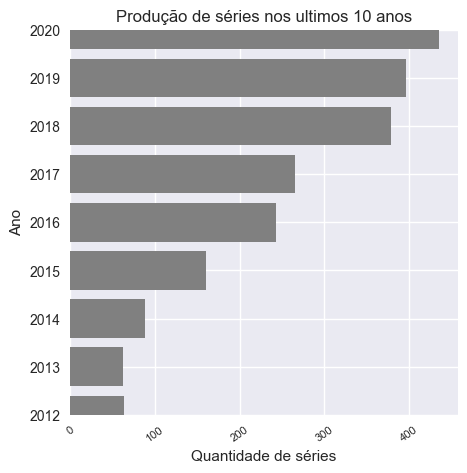

In [966]:
#Plotagem do gráfico series
plt.figure(figsize=(5,5))
plt.barh(series_ano.sort_values().index, series_ano.sort_values(), color='grey')

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Ano')
plt.xlabel('Quantidade de séries')
plt.ylim(2012,2020)
plt.title('Produção de séries nos ultimos 10 anos')
plt.show()

In [967]:
classificacao_series = df_series['classificacao indicativa'].value_counts()
classificacao_series

Adulto                 1150
Acima de 14 anos        731
Criança acompanhada     321
Acima de 7 anos         195
Infantil                175
Geral                    94
Name: classificacao indicativa, dtype: int64

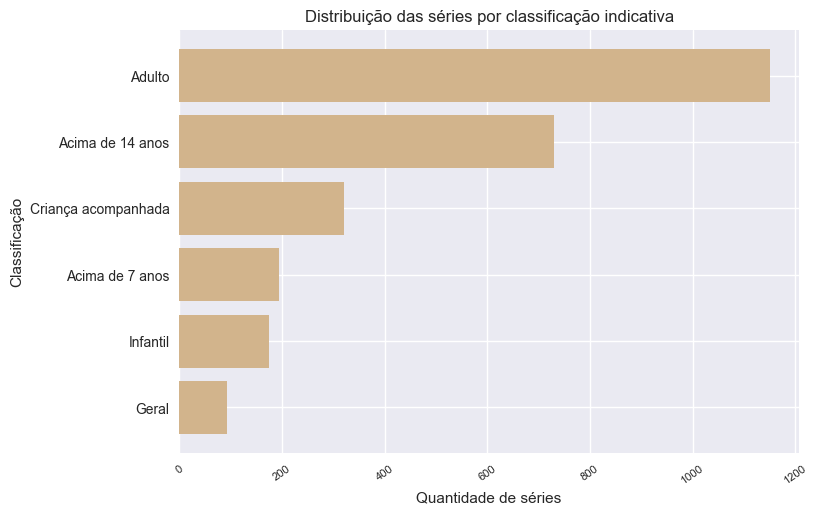

In [968]:
#Plotagem do gráfico series
plt.figure()
plt.barh(classificacao_series.sort_values().index, classificacao_series.sort_values(), color='tan')

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Classificação')
plt.xlabel('Quantidade de séries')
plt.title('Distribuição das séries por classificação indicativa')
plt.show()

In [969]:
#Duração das series por ordem decrescente
df_series.groupby(['duration']).size().sort_values(ascending=False).to_frame()

,0
duration,
1,1793
2,421
3,198
4,94
5,64
6,33
7,23
8,17
9,9


**Análise por tipo de conteúdo - filmes**

In [970]:
df_filmes = df[df['type'] == 'Movie']
df_filmes

,show_id,type,title,country,release_year,duration,Ano_Adição,classificacao indicativa,genero
0,s1,Movie,Dick Johnson Is Dead,United States,2020,90,2021.0,Acima de 13 anos,Documentaries
6,s7,Movie,My Little Pony: A New Generation,United States,2021,91,2021.0,Criança acompanhada,Children & Family Movies
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125,2021.0,Adulto,Dramas
9,s10,Movie,The Starling,United States,2021,104,2021.0,Acima de 13 anos,Comedies
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic",2021,127,2021.0,Adulto,Dramas
...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,"United Arab Emirates, Jordan",2015,96,2016.0,Adulto,Dramas
8802,s8803,Movie,Zodiac,United States,2007,158,2019.0,Adulto,Cult Movies
8804,s8805,Movie,Zombieland,United States,2009,88,2019.0,Adulto,Comedies
8805,s8806,Movie,Zoom,United States,2006,88,2020.0,Criança acompanhada,Children & Family Movies


In [971]:
#Trocando valores NaN por 70 min, que é a duração média de um filme
df_filmes['duration'] = df_filmes['duration'].fillna(70)

In [972]:
#Quantidade de filmes por duração em ordem decrescente
filmes_duracao = df_filmes['duration'].value_counts().to_frame()
filmes_duracao.head(10)

,duration
90,152
94,146
93,146
97,146
91,144
95,137
96,130
92,129
102,122
98,120


In [973]:
#5 países com mais produções de filmes
country_filmes = df_filmes['country'].value_counts().head(5)
country_filmes

United States     2495
India              893
United Kingdom     206
Canada             122
Spain               97
Name: country, dtype: int64

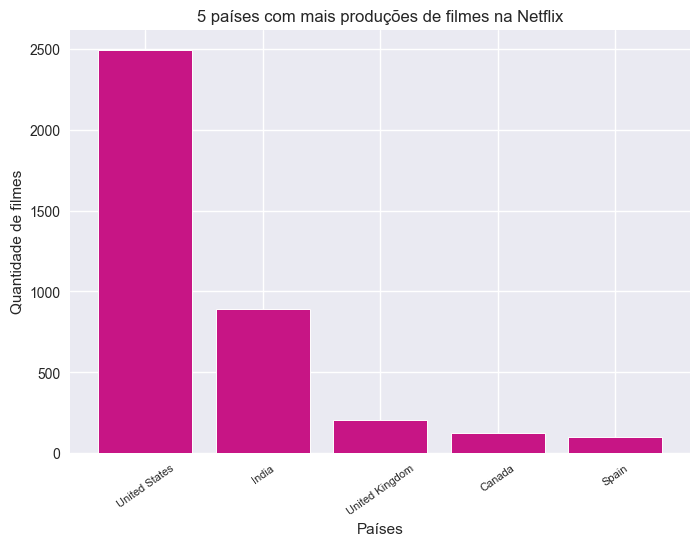

In [974]:
#Plotagem do gráfico filmes
plt.figure()
plt.bar(country_filmes.index, country_filmes, color='mediumvioletred', edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Quantidade de filmes')
plt.xlabel('Países')
plt.title('5 países com mais produções de filmes na Netflix')
plt.show()

In [975]:
genero_filmes = df_filmes['genero'].value_counts().head(10)
genero_filmes

Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
Children & Family Movies     605
Stand-Up Comedy              334
Horror Movies                275
International Movies         128
Classic Movies                80
Thrillers                     65
Name: genero, dtype: int64

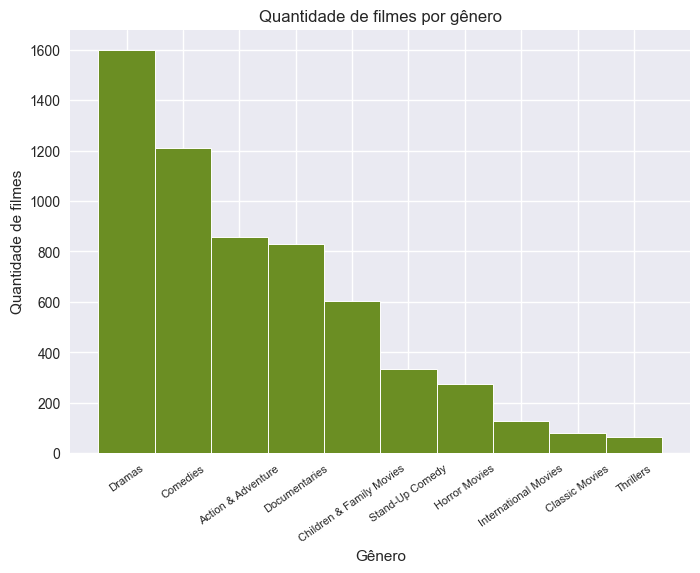

In [976]:
#Plotagem do gráfico series
plt.figure()
plt.bar(genero_filmes.index, genero_filmes, color='olivedrab', width=1, edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Quantidade de filmes')
plt.xlabel('Gênero')
plt.title('Quantidade de filmes por gênero')
plt.show()

In [977]:
classificacao_filmes = df_filmes['classificacao indicativa'].value_counts()
classificacao_filmes

Adulto                 2940
Acima de 14 anos       1427
Criança acompanhada     828
Acima de 13 anos        491
Geral                   167
Acima de 7 anos         144
Infantil                131
Name: classificacao indicativa, dtype: int64

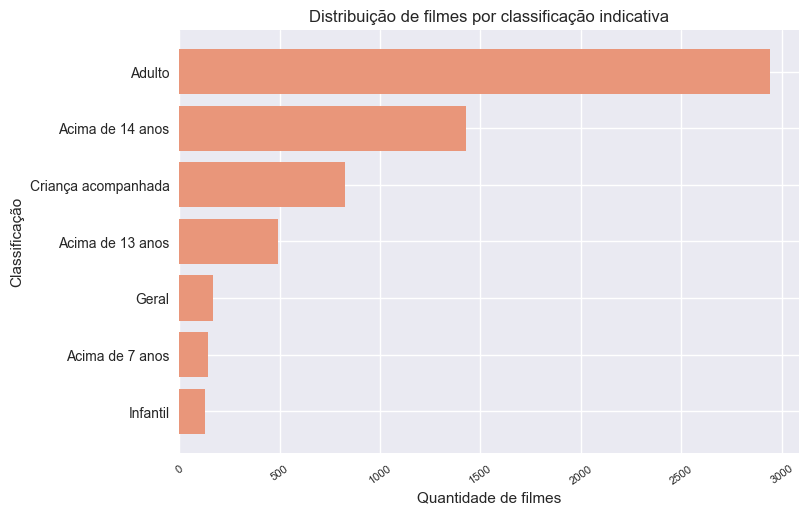

In [978]:
#Plotagem do gráfico series
plt.figure()
plt.barh(classificacao_filmes.sort_values().index, classificacao_filmes.sort_values(), color='darksalmon')

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Classificação')
plt.xlabel('Quantidade de filmes')
plt.title('Distribuição de filmes por classificação indicativa')
plt.show()

In [979]:
filmes_ano = df_filmes['release_year'].value_counts().head(10)
filmes_ano 

2018    767
2017    766
2016    658
2019    633
2020    517
2015    397
2021    277
2014    264
2013    225
2012    173
Name: release_year, dtype: int64

**Subplotagem**

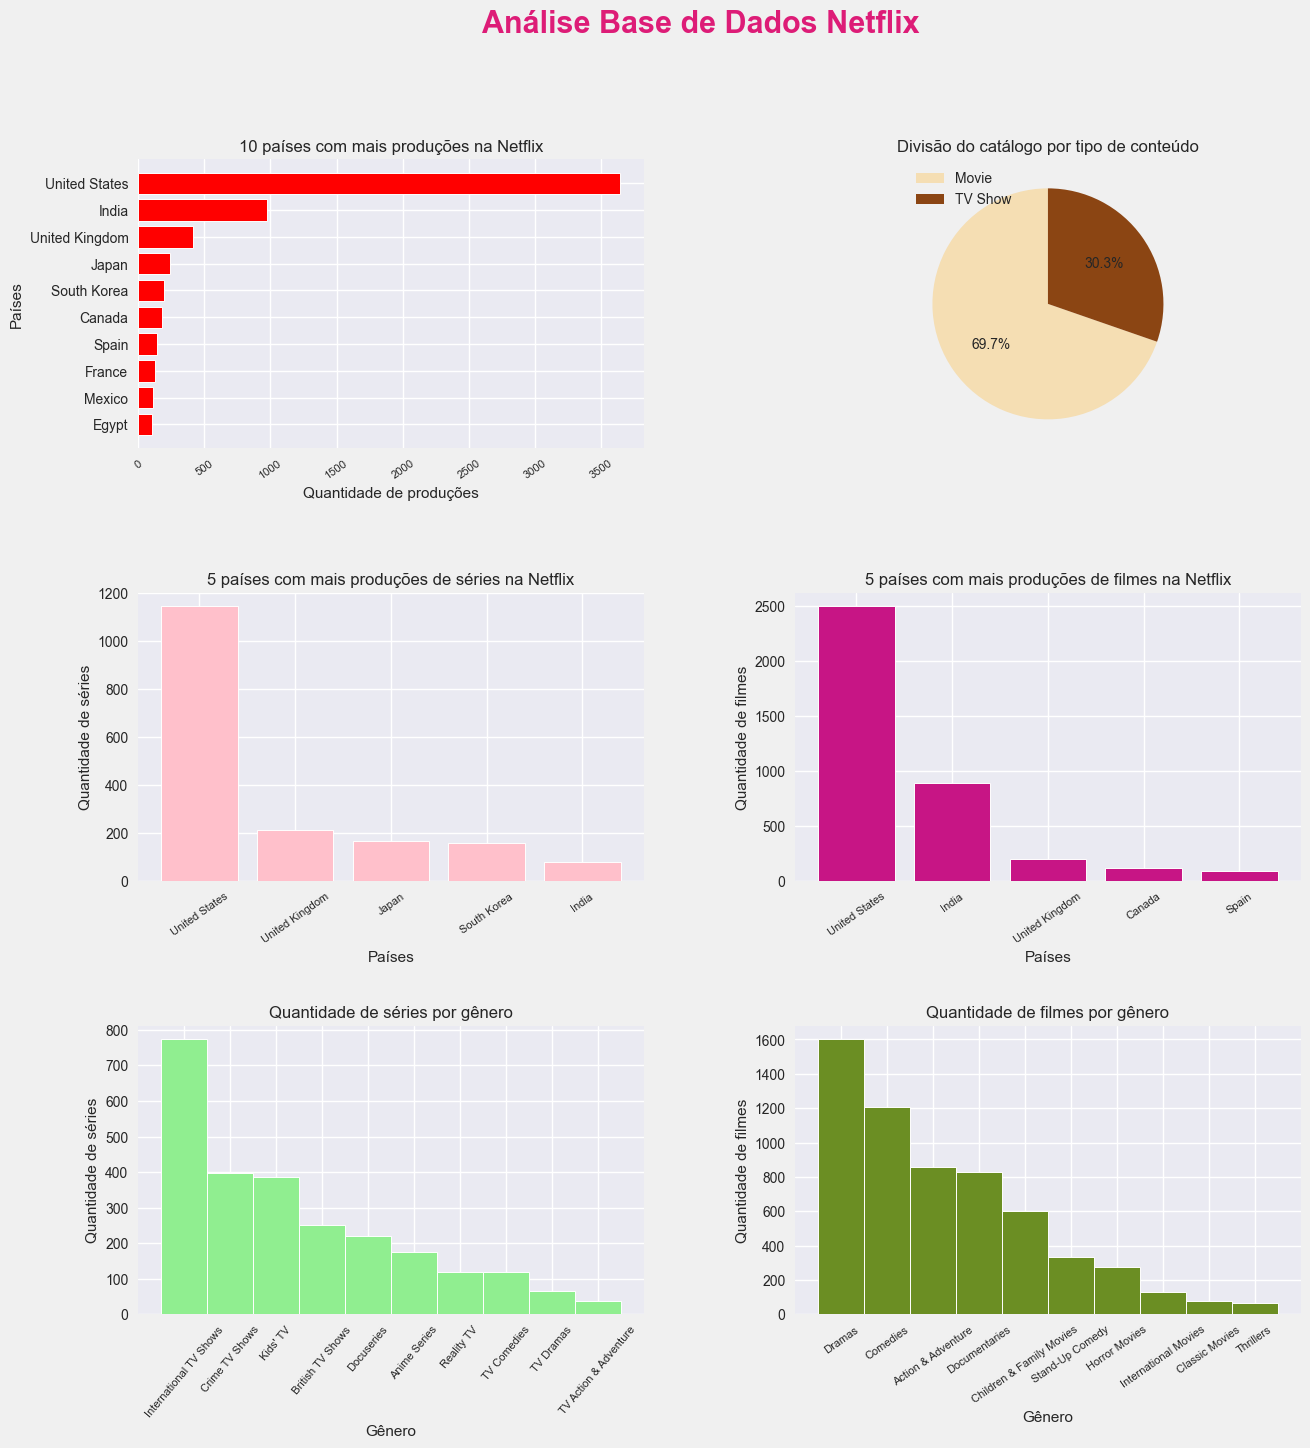

In [980]:
fig, ax = plt.subplots(figsize=(15, 15) )

Cor_Fundo = '#f0f0f0'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

plt.style.use('seaborn')
plt.suptitle('Análise Base de Dados Netflix', fontsize=22, color='#dd1c77', fontweight=600 )

Linhas = 3
Colunas = 2

#Gráfico1
#Plotagem do gráfico series
plt.subplot( Linhas, Colunas, 1)
plt.barh(country.sort_values().index, country.sort_values(), color='red', edgecolor='white', linewidth=0.7)
#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)
#Definindo os eixos e título
plt.ylabel('Países')
plt.xlabel('Quantidade de produções')
plt.title('10 países com mais produções na Netflix')


#Grafico2
#Definindo o tamanho da figura
plt.subplot( Linhas, Colunas, 2)
#Definição do tema
plt.title("Divisão do catálogo por tipo de conteúdo")
#Plotagem do gráfico
colors= ['wheat','saddlebrown']
grafico = plt.pie(tipo, colors=colors, startangle=90, autopct='%1.1f%%')
#Adicionando legenda
legenda = tipo.index
plt.legend(legenda)


#Grafico3
#Plotagem do gráfico series
plt.subplot(Linhas, Colunas, 3)
plt.bar(country_series.index, country_series, color='pink', edgecolor='white', linewidth=0.7)
#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)
#Definindo os eixos e título
plt.ylabel('Quantidade de séries')
plt.xlabel('Países')
plt.title('5 países com mais produções de séries na Netflix')


#Grafico4
plt.subplot(Linhas, Colunas, 4)
plt.bar(country_filmes.index, country_filmes, color='mediumvioletred', edgecolor='white', linewidth=0.7)
#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)
#Definindo os eixos e título
plt.ylabel('Quantidade de filmes')
plt.xlabel('Países')
plt.title('5 países com mais produções de filmes na Netflix')

#Grafico5
plt.subplot(Linhas, Colunas,5)
plt.bar(genero.index, genero, color='lightgreen', width=1, edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=50,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Quantidade de séries')
plt.xlabel('Gênero')
plt.title('Quantidade de séries por gênero')

#Gráfico6

plt.subplot(Linhas, Colunas, 6)
plt.bar(genero_filmes.index, genero_filmes, color='olivedrab', width=1, edgecolor='white', linewidth=0.7)

#Definindo a rotação, 
plt.xticks(rotation=35,fontsize=8)

#Definindo os eixos e título
plt.ylabel('Quantidade de filmes')
plt.xlabel('Gênero')
plt.title('Quantidade de filmes por gênero')




#Ajustar os espaçamentos das figuras
plt.subplots_adjust( hspace=0.50, wspace=0.30 )




